# Ejercicio TensorFlow 2.0

Usaremos el mismo caso visto previamente pero ahora utilizando TensorFlow.

## Cargamos las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-01-07 10:12:58.660758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Generamos los datos con la misma lógica que en el ejercicio previo.

Con una diferencia.  En el mundo real, lo habitual es cargar los datos a través de un csv, bbdd, ...
Vamos a recrear la carga de los datos que hayamos generado de manera aleatoria, guardándolos en formato npz.
El formato npz es un formato Numpy, que permite guardar arrays en una fichero.

In [11]:
observations = 1000

np.random.seed(123)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

# Hasta aquí hemos generado los mismos datos, ahora los guardamos
np.savez('data', inputs=inputs, targets=targets)

# Resolviendo con TensorFlow

In [12]:
# Cargamos el conjunto de datos
training_data = np.load('data.npz')

In [4]:
# Declaramos una variable donde guardaremos el total de variables del modelo
# En nuestro caso 2 xs y zs
#input_size = 2

# Declaramos el total de variables de salida del modelo
# En nuestro caso 1
output_size = 1

# Definimos nuestro modelo como secuencial.
# En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
model = tf.keras.Sequential([
                            # Cada capa se lista aquí
                            # Definimos las características de la red
                            # Dense, nos permite definir la operación matemática a ejecutar xw + b
                            # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Definimos el ratio de aprendizaje
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Definimos el modelo con los datos de entrada y targets.
# Ejecutamos 100 ciclos
model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 75.1610
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 5.9659
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 1.8380
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.7604
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.4655
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.3628
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.3349
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.3682
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.3569
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.3684
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.3363
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.3785
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.3427
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.3549
Epoch 15/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

## Extraemos los pesos y bias

La extracción de pesos y bias del modelo no es necesaria en el proceso de machine learning.  De hecho, no se ejecuta habitualmente, pero en este ejemplo simple nos sirve para comprobar que los resultados son correctos.

In [5]:
# La extracción de pesos y biases es muy sencilla
model.layers[0].get_weights()

[array([[ 2.0131457],
        [-3.0370498]], dtype=float32),
 array([4.983152], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weights)
print(bias)

# éste es un modelo simple, pero en otros más complicados podemos tener cientos o miles de valores en estas variables

[[ 2.0131457]
 [-3.0370498]]
[4.983152]


## Generar las predicciones

In [7]:
# Datos predichos
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 38.3],
       [ -3.3],
       [  6.8],
       [ -1.5],
       [ 13.8],
       [ 30.1],
       [ 35.4],
       [ 13.1],
       [ -0.2],
       [ 24.6],
       [-10.4],
       [ 23.7],
       [ 21.8],
       [-31.3],
       [ 27.1],
       [-11.5],
       [-20.3],
       [ -6.6],
       [ 35.9],
       [ 12.9],
       [  1.5],
       [ -2.7],
       [  6.9],
       [ 15.7],
       [ 17.1],
       [-24.8],
       [  8.4],
       [ 20.5],
       [  0.2],
       [-20. ],
       [ -4.1],
       [ 21. ],
       [ 29.8],
       [ 24.7],
       [ 12.7],
       [ -7.1],
       [ -8. ],
       [ 48.6],
       [ -3.6],
       [ 21.1],
       [ 31.3],
       [-12.4],
       [-13.2],
       [ 13.3],
       [  9.4],
       [  7.4],
       [-20.1],
       [  1.4],
       [ 31.8],
       [ 30.8],
       [-22.3],
       [ 48.5],
       [-10.4],
       [ 15.5],
       [-16.2],
       [ 24.8],
       [ 19.3],
       [ 38.4],
       [ 39.5],
       [ 12.4],
       [ 12.3],
       [-16.8],
       [

In [8]:
# Datos reales
training_data['targets'].round(1)

array([[ 37.8],
       [ -3.5],
       [  5.8],
       [ -0.6],
       [ 14.1],
       [ 30.3],
       [ 35.4],
       [ 12.7],
       [ -0.1],
       [ 23.6],
       [-10.9],
       [ 23.2],
       [ 21.9],
       [-30.7],
       [ 27.4],
       [-11.2],
       [-19.7],
       [ -7.4],
       [ 36.5],
       [ 13.6],
       [  2.5],
       [ -3.2],
       [  6.2],
       [ 15.7],
       [ 17.7],
       [-24. ],
       [  7.9],
       [ 20.2],
       [ -0.3],
       [-19.5],
       [ -4. ],
       [ 19.9],
       [ 29.8],
       [ 23.7],
       [ 11.6],
       [ -6.3],
       [ -8.4],
       [ 48.1],
       [ -2.5],
       [ 21.2],
       [ 30.8],
       [-11.5],
       [-13.5],
       [ 13.1],
       [  9.6],
       [  7.5],
       [-20.8],
       [  1.3],
       [ 31.5],
       [ 30.4],
       [-21.4],
       [ 48.5],
       [ -9.3],
       [ 14.9],
       [-16.7],
       [ 23.9],
       [ 19.4],
       [ 37.5],
       [ 39.6],
       [ 12.7],
       [ 11.4],
       [-16. ],
       [

## Pintamos los datos

In [9]:
np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets'])

(array([ 3.82897186e+01, -3.32620287e+00,  6.80842257e+00, -1.45401144e+00,
         1.38235035e+01,  3.00682926e+01,  3.53564758e+01,  1.30894909e+01,
        -1.70319080e-01,  2.46400013e+01, -1.04403629e+01,  2.36993198e+01,
         2.17695675e+01, -3.12913456e+01,  2.70803604e+01, -1.15391064e+01,
        -2.03294678e+01, -6.60148001e+00,  3.59460754e+01,  1.29385214e+01,
         1.53858566e+00, -2.74844313e+00,  6.86727524e+00,  1.56666355e+01,
         1.71368141e+01, -2.48193684e+01,  8.44706535e+00,  2.04549980e+01,
         1.59604549e-01, -2.00202732e+01, -4.13717508e+00,  2.09579296e+01,
         2.98287334e+01,  2.47145729e+01,  1.26833658e+01, -7.08749819e+00,
        -8.04016495e+00,  4.85917778e+01, -3.62768602e+00,  2.11146908e+01,
         3.12901821e+01, -1.23657818e+01, -1.31602058e+01,  1.32614651e+01,
         9.43979836e+00,  7.43055296e+00, -2.01282368e+01,  1.40942717e+00,
         3.18137608e+01,  3.07635136e+01, -2.23217258e+01,  4.84857826e+01,
        -1.0

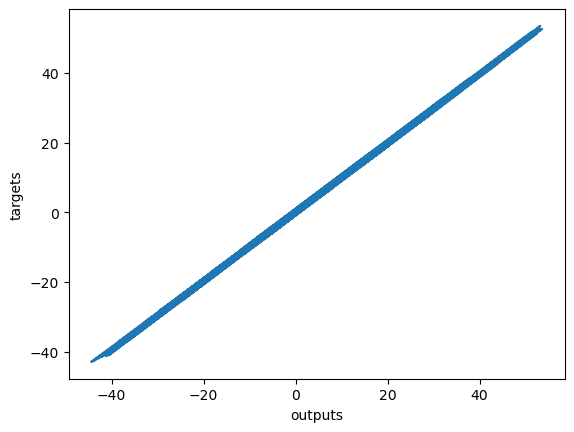

In [10]:
# Usamos np.squeeze para poder ajustar los datos a lo que espera plt.plot
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# La idea de haber usado TensorFlow para el mismo ejercicio y poder comparar las líneas de código necesarias
# para obtener el mismo resultado.  Muchas menos en TensorFlow
